Exploration of the model

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx


NameError: name 'ema_logging' is not defined

In [5]:
from ema_workbench import (
    Model,
    Policy,
    ema_logging,
    MultiprocessingEvaluator, save_results
)
from dike_model_function import DikeNetwork
from problem_formulation import get_model_for_problem_formulation

In [6]:


# choose problem formulation number, between 0-5
dike_model, planning_steps = get_model_for_problem_formulation(2)

In [7]:
import copy

uncertainties = copy.deepcopy(dike_model.uncertainties)

In [8]:
# defining specific policies

def get_do_nothing_dict():
    return {l.name: 0 for l in dike_model.levers}

policies = [
    Policy("Baseline", **{l.name:0 for l in dike_model.levers}),
    Policy("RfR everywhere",
        **dict(
            get_do_nothing_dict(),
            **{'0_RfR 0':1,
                '0_RfR 1':1,
                '0_RfR 2':1,
                '1_RfR 0':1,
                '1_RfR 1':1,
                '1_RfR 2':1,
                '2_RfR 0':1,
                '2_RfR 1':1,
                '2_RfR 2':1,
                '3_RfR 0':1,
                '3_RfR 1':1,
                '3_RfR 2':1,
                '4_RfR 0':1,
                '4_RfR 1':1,
                '4_RfR 2':1}
        )
    ),
    Policy("Dike heightening everywhere",
        **dict(
            get_do_nothing_dict(),
            **{'A.1_DikeIncrease 0':5,
                'A.1_DikeIncrease 1':5,
                'A.1_DikeIncrease 2':5,
                'A.2_DikeIncrease 0':5,
                'A.2_DikeIncrease 1':5,
                'A.2_DikeIncrease 2':5,
                'A.3_DikeIncrease 0':5,
                'A.3_DikeIncrease 1':5,
                'A.3_DikeIncrease 2':5,
                'A.4_DikeIncrease 0':5,
                'A.4_DikeIncrease 1':5,
                'A.4_DikeIncrease 2':5,
                'A.5_DikeIncrease 0':5,
                'A.5_DikeIncrease 1':5,
                'A.5_DikeIncrease 2':5}
        )
    ),
    #Dike heightening occurs only in the last timesteps.
    Policy("RfR in natura areas",
        **dict(
            get_do_nothing_dict(),
            **{'0_RfR 0':1,
                '1_RfR 0':1,
                'A.3_DikeIncrease 0':0,
                'A.3_DikeIncrease 1':0,
                'A.3_DikeIncrease 2':5,
                'A.4_DikeIncrease 0':0,
                'A.4_DikeIncrease 1':0,
                'A.4_DikeIncrease 2':5,
                'A.5_DikeIncrease 0':0,
                'A.5_DikeIncrease 1':0,
                'A.5_DikeIncrease 2':5}
        )
    ),
]

In [9]:
#run the model with the EMA workbench
n_scenarios = 200
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios, policies)

100%|████████████████████████████████████████| 800/800 [01:13<00:00, 10.95it/s]


In [10]:
save_results(results, 'exploration_results.tar.gz')

[MainProcess/INFO] results saved successfully to /Users/juanita/Documents/GitHub/epa1361_open/final assignment/exploration_results.tar.gz


In [10]:
experiments, outcomes = results
policies = experiments['policy']

In [11]:
#convert outcomes into a dataframe to plot
data = pd.DataFrame.from_dict(outcomes)
data['policy'] = policies

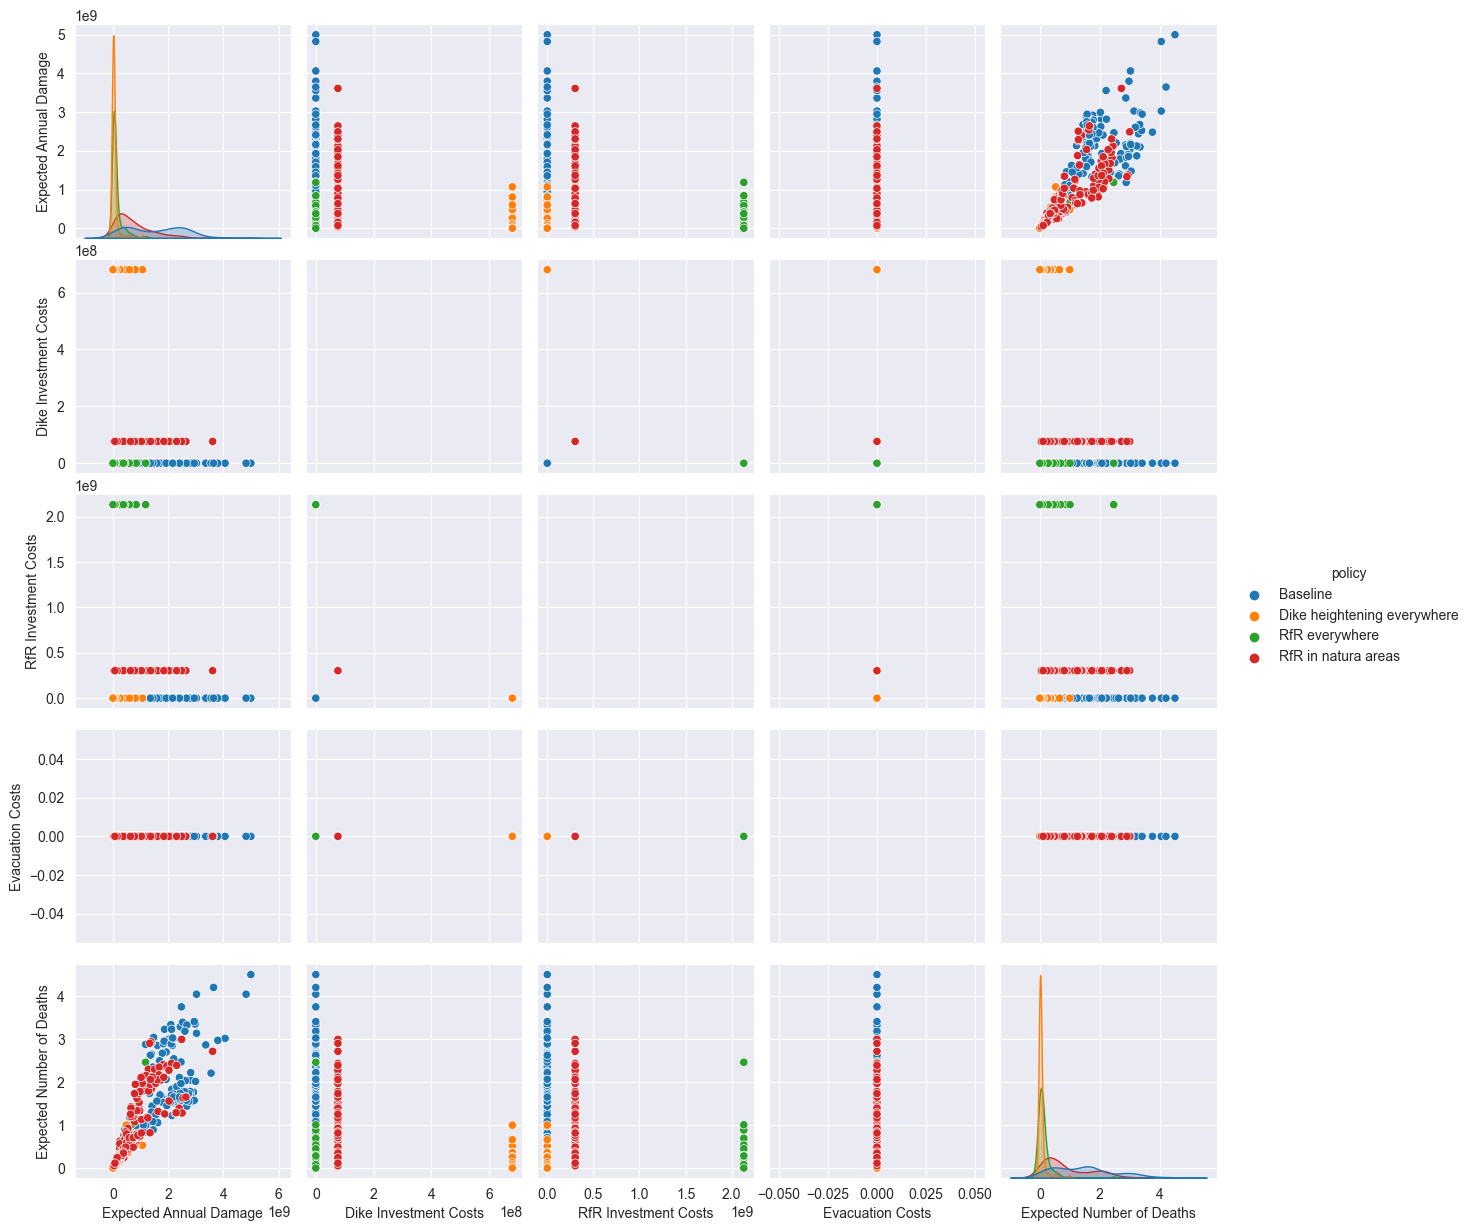

In [12]:
#plot results
plot = sns.pairplot(data, hue='policy', vars=outcomes.keys(), )
plt.show()